In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#comment below if not using ipython notebook
%matplotlib inline

In [2]:
data  = pd.read_csv('Assignment2.data', sep='\t')
data.head()

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47


### Plotting the Data

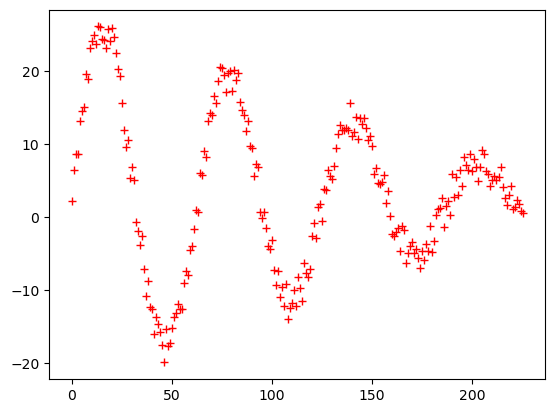

In [4]:
plt.plot(data.index,data.SpringPos,'r+')

## Useful functions  

In [6]:
# estimate the value of the beta vector assuming that X is made of independent features.
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate yhat from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # perform estimation of yhat.
    return np.matmul(X, beta)

# compute the sum of squared error between y and yhat.
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [7]:
damp_spring=data.copy()

In [8]:
damp_spring=damp_spring.drop('StockPrice',axis=1)

In [9]:
damp_spring['Time']=damp_spring.index

In [10]:
damp_spring=damp_spring[['Time','SpringPos']]

In [11]:
damp_spring.head()

,Time,SpringPos
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17


## Implementing Task-1 on Spring Problem
Let’s consider the ‘y2’ dataset against time ‘x’. Fit a linear model y2 = mx that minimizes the SSE. Note that there is no need for the ‘c’, as you observe that the trend line (linear model) is passing through ‘0’ (origin).

In [13]:
def error_calculator(theta):
    pred=[np.tan(theta)*t for t in damp_spring['Time']]  #here intercept is 0 
    err_arr=[]
    true_arr=np.array(damp_spring['SpringPos'])
    for i in range(0,len(pred)):
        err_arr.append((true_arr[i]-pred[i])**2)
        
    return np.sum(err_arr)

### Implementing Linear search to get lower sse.

In [15]:
error_by_tan=[]
for i in np.arange(0,np.pi/3,np.pi/16):    #pi/3 for 60 degrees pi/16 for 5 degree increment.
 
    error_by_tan.append(error_calculator(i))

In [16]:
error_by_tan

[29021.3684,
 152392.40478597625,
 626796.8576665442,
 1641917.3056854045,
 3711186.628399999,
 8380536.823280607]

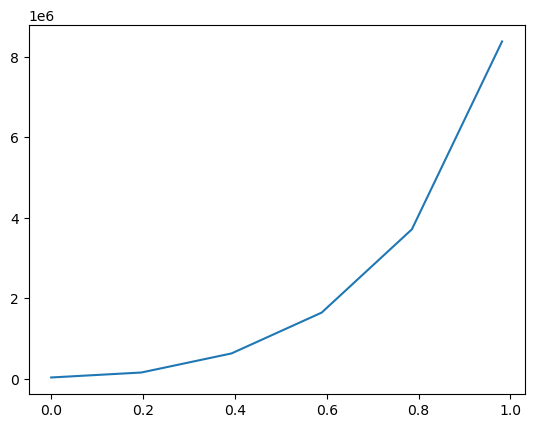

In [17]:
plt.plot(np.arange(0,np.pi/3,np.pi/16),error_by_tan)

### Transforming the above columns into matrices 

In [19]:
feature_1=damp_spring[['Time']].values
spring_pos=damp_spring[['SpringPos']].values

In [20]:
beta=estimateBeta(feature_1, spring_pos)

In [21]:
beta

array([[0.01832175]])

### So , Using OLS we are getting the value of slope approx 0.018 which we predicted from linear search.

In [23]:
yhat=predict(beta, feature_1)

In [24]:
sse=SSE(spring_pos,yhat)

In [25]:
sse

27738.298279267474

### Implementing through sklearn linear regression :

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model=LinearRegression()
model.fit(damp_spring[['Time']].values,damp_spring[['SpringPos']])

LinearRegression()

In [29]:
model.coef_

array([[-0.02724716]])

### So , Using sk-learn linear model we are getting the value of slope approx -0.027 which we predicted from linear search.

In [31]:
model.intercept_

array([6.8505263])

### Calculating SSE in the linear regression by SSE

In [33]:
pred=model.predict(damp_spring[['Time']].values)

In [34]:
sse=np.sum((pred-damp_spring[['SpringPos']].values)**2)

In [35]:
sse

25069.131971939343

### Difference of SSE values thorugh three different model

From OLS SSE = 27738 
from tan(theta) approximation m = 29021
from Linear Regression SSE = 25069
<br>Build in Linear Regression works better predict Slope of regression Line.

### Above is the sklearn linear regression SSE (It also includes Task -2 Interploation Part )

## Task-3 (Extrapolation Part)
Splitting into train_and_testing data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(feature_1,spring_pos,test_size=0.25,random_state=30)

In [42]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
pred=model.predict(X_test)

In [44]:
np.sum((pred-y_test)**2)

5843.726667405394

### Plotting the Rigression 

Text(0.5, 0, 'Time')

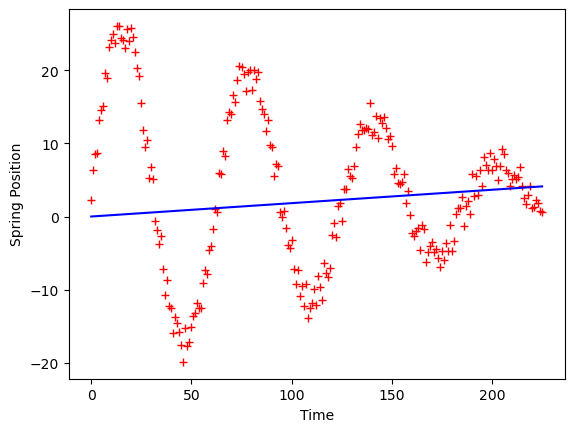

In [46]:
plt.plot(feature_1, spring_pos, 'r+')
plt.plot(feature_1, yhat, 'b-')  # yhat = y2.x*beta[0]
plt.ylabel('Spring Position')
plt.xlabel('Time')

### Let's add an intercept to the data and check if the SSE drops further.

In [48]:
damp_spring['Bias']=np.ones(226)

In [49]:
damp_spring=damp_spring[['Bias','Time','SpringPos']]

In [50]:
damp_spring.head()

,Bias,Time,SpringPos
0,1.0,0,2.27
1,1.0,1,6.38
2,1.0,2,8.61
3,1.0,3,8.65
4,1.0,4,13.17


In [51]:
feature_1 = damp_spring[["Bias","Time"]].values
spring_pos = damp_spring[['SpringPos']].values

In [52]:
beta=estimateBeta(feature_1, spring_pos)

In [53]:
beta

array([[ 6.8505263 ],
       [-0.02724716]])

In [54]:
yhat=predict(beta, feature_1)

In [55]:
sse=SSE(spring_pos,yhat)

In [56]:
sse

25069.131971939343

### Yes, We can see that the value of sse dropped to 25069.So Adding bias term reduces to SSE.


Text(0.5, 0, 'Time')

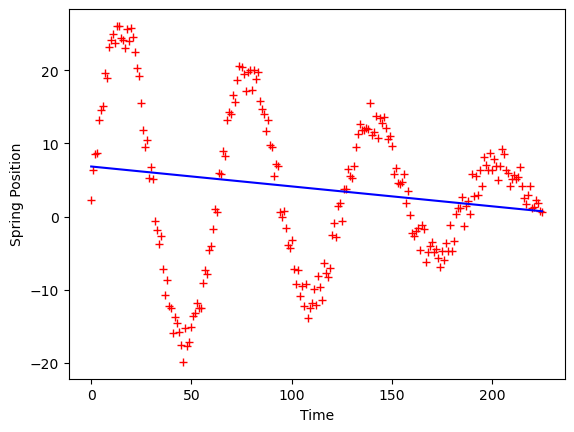

In [58]:
plt.plot(damp_spring['Time'], spring_pos, 'r+')
plt.plot(damp_spring['Time'], yhat, 'b-') 
plt.ylabel('Spring Position')
plt.xlabel('Time')

### Updating the dataFrame for Sine wave

Adding Two new columns one is "Scaled Time" and the other one as Sin("scaled Time") to capure the sinosodal behaviour

In [61]:
damp_spring['x_1']=round(damp_spring.Time*beta[1],2)

In [62]:
damp_spring

,Bias,Time,SpringPos,x_1
0,1.0,0,2.27,-0.00
1,1.0,1,6.38,-0.03
2,1.0,2,8.61,-0.05
3,1.0,3,8.65,-0.08
4,1.0,4,13.17,-0.11
...,...,...,...,...
221,1.0,221,1.37,-6.02
222,1.0,222,2.29,-6.05
223,1.0,223,1.80,-6.08
224,1.0,224,0.82,-6.10


In [63]:
damp_spring['x_2'] = np.sin(damp_spring['x_1'])

In [64]:
damp_spring=damp_spring[['Bias','Time','x_1','x_2','SpringPos']]

In [65]:
damp_spring

,Bias,Time,x_1,x_2,SpringPos
0,1.0,0,-0.00,-0.000000,2.27
1,1.0,1,-0.03,-0.029996,6.38
2,1.0,2,-0.05,-0.049979,8.61
3,1.0,3,-0.08,-0.079915,8.65
4,1.0,4,-0.11,-0.109778,13.17
...,...,...,...,...,...
221,1.0,221,-6.02,0.260157,1.37
222,1.0,222,-6.05,0.231078,2.29
223,1.0,223,-6.08,0.201790,1.80
224,1.0,224,-6.10,0.182163,0.82


In [66]:
feature_1 = damp_spring[['Bias', 'x_1', 'x_2']].values
spring_pos = damp_spring[['SpringPos']].values

In [67]:
beta=estimateBeta(feature_1, spring_pos)

In [68]:
beta

array([[11.99634589],
       [ 2.6761454 ],
       [ 5.21496085]])

In [69]:
yhat=predict(beta, feature_1)

In [70]:
sse=SSE(spring_pos,yhat)

In [71]:
sse

23939.673440425053

Text(0.5, 0, 'Time')

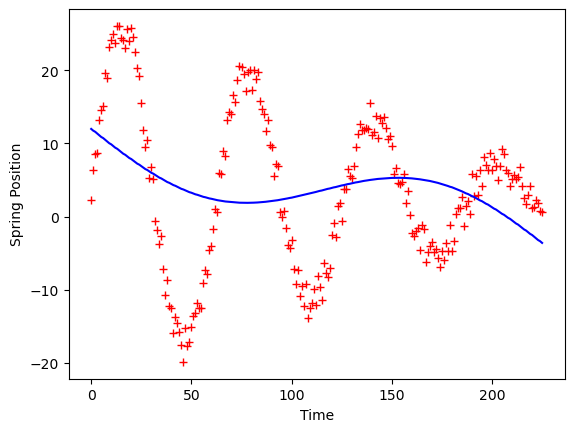

In [72]:
plt.plot(damp_spring['Time'], spring_pos, 'r+')
plt.plot(damp_spring['Time'], yhat, 'b-') 
plt.ylabel('Spring Position')
plt.xlabel('Time')

#### The error dropped by some amount on scaling time and including sine in the model

### Let's use the polynomial features generator instead of manually doing it.

In [75]:
X=damp_spring[['x_1']].values
y = damp_spring[['SpringPos']].values

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 17)   # 10, 11
X_poly = poly_transformer.fit_transform(X)

### Fit the model and estimate the loss

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, spring_pos)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat4 = model.predict(X_poly)

# beta4 = estimateBeta(X_poly, spring_pos)
# print("Beta = ", beta4)
# yhat4 = predict(beta4, X_poly)

loss = SSE(spring_pos, yhat4)
print("SSE = ", loss)

Intercept= [2.91641529] Beta =  [[ 0.00000000e+00 -9.41219606e+01 -3.61351639e+01  1.48396523e+02
  -2.00377708e+01 -1.11223186e+02  6.06164410e+01  7.46964537e+01
  -4.39129828e+01 -7.69161696e+01 -3.98071121e+01 -1.02716671e+01
  -1.16719576e+00  6.40247148e-02  3.98854512e-02  5.56967303e-03
   3.65137400e-04  9.66637158e-06]]
SSE =  460.0673010382634


### Let's plot the raw data and the regression line on the same plot    

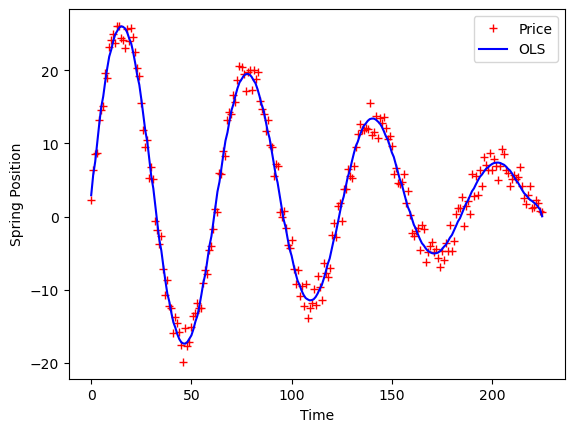

In [80]:
plt.plot(damp_spring[['Time']].values, damp_spring[['SpringPos']].values, 'r+')
plt.plot(damp_spring[['Time']].values, yhat4, 'b-')
plt.ylabel('Spring Position')
plt.xlabel('Time')
plt.legend(['Price', 'OLS'], loc='upper right')
plt.show()